# **Quick start: atlasapprox in Python**

The [*atlasapprox*](https://atlasapprox.readthedocs.io/en/latest/index.html) API provides access to approximated single-cell data across 28 species, including both animals and plants. You can explore data from species such as *Homo sapiens* (humans), *Mus musculus* (mice), *Arabidopsis thaliana* (thale cress), and *Zea mays* (corn). Follow this guide to get started with installation, basic usage, and example queries.

## **Create virtual environment**

To ensure consistent dependencies, setting up a virtual environment is recommended before installing the package. Here's one way to do it:

In [ ]:
# Create a virtual environment
python -m venv myenv

# Activate your environment (use the appropriate command for your OS)

# For macOS/Linux users
ource myenv/bin/activate

# For Windows users
myenv\Scripts\activate 

## **Installation**

Use *pip* to install the *atlasapprox* Python package:

In [11]:
pip install atlasapprox


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## **Initialize the API**

Import the *atlasapprox* Python package and create an API object:

In [ ]:
import atlasapprox

api = atlasapprox.API()

## **Getting average gene expression**

The `average` function allows you to retrieve the average gene expression data for selected genes within an organism's specific organ.

The following example shows how to examine the average expression of five genes (*COL13A1*, *COL14A1*, *TGFBI*, *PDGFRA*, *GZMA*) in the human lung:

In [13]:
# Call API function with params
avg_gene_expr_lung = api.average(
    organism = "h_sapiens", 
    organ = "lung", 
    features = ["COL13A1", "COL14A1", "TGFBI", "PDGFRA", "GZMA"], 
    measurement_type = "gene_expression"
)

# Display the result
avg_gene_expr_lung

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806


#### Understand the output
The function returns a *Pandas DataFrame* where:
* Each row represents a gene.  
* Each column corresponds to a cell type.
* The values indicate the average gene expression (measured in counts per ten thousand, or cptt).

## **Start from scratch**

If you're starting from scratch, the following steps will help you explore the API.

1. Ask about available organisms:

In [14]:
organisms = api.organisms()
print(organisms)

{'gene_expression': ['a_queenslandica', 'a_thaliana', 'c_elegans', 'c_gigas', 'c_hemisphaerica', 'c_intestinalis', 'd_melanogaster', 'd_rerio', 'f_vesca', 'h_miamia', 'h_sapiens', 'h_vulgaris', 'i_pulchra', 'l_minuta', 'm_leidyi', 'm_murinus', 'm_musculus', 'n_vectensis', 'o_sativa', 'p_crozieri', 'p_dumerilii', 's_lacustris', 's_mansoni', 's_mediterranea', 's_pistillata', 's_purpuratus', 't_adhaerens', 't_aestivum', 'x_laevis', 'z_mays']}


2. Ask about available organs within your organism of interest:

In [15]:
organs = api.organs(organism="h_sapiens")
print(organs)

['bladder', 'blood', 'colon', 'eye', 'fat', 'gut', 'heart', 'kidney', 'liver', 'lung', 'lymphnode', 'mammary', 'marrow', 'muscle', 'pancreas', 'prostate', 'salivary', 'skin', 'spleen', 'thymus', 'tongue', 'trachea', 'uterus']


3. Ask about available cell types within your organism and organ of interest:

In [16]:
cell_types = api.celltypes(organism="h_sapiens", organ="lung", measurement_type = "gene_expression")
print(cell_types)

['neutrophil', 'basophil', 'monocyte', 'macrophage', 'dendritic', 'B', 'plasma', 'T', 'NK', 'plasmacytoid', 'goblet', 'AT1', 'AT2', 'club', 'ciliated', 'basal', 'serous', 'mucous', 'arterial', 'venous', 'capillary', 'CAP2', 'lymphatic', 'fibroblast', 'alveolar fibroblast', 'smooth muscle', 'vascular smooth muscle', 'pericyte', 'mesothelial', 'ionocyte']


### **More tutorials (coming soon)**
- explore average gene expression
- explore cell type
- highest measurements by cell type across an organism
- marker genes
- gene coexpression
- gene homologs
- neighborhoods
- gene interaction partners
- ...

## **Conclusion**

This tutorial provided a quick start guide to use the *atlasapprox* Python package. For more detailed information, refer to the official [documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html). 

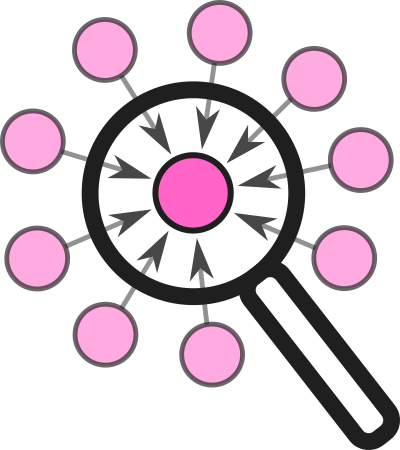

In [18]:
from IPython.display import display, Image

display(Image(filename="../_static/quick_start.png"))